In [83]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.constants as const

WIDTH = 100e-6
LENGTH = 300e-6


# Part A


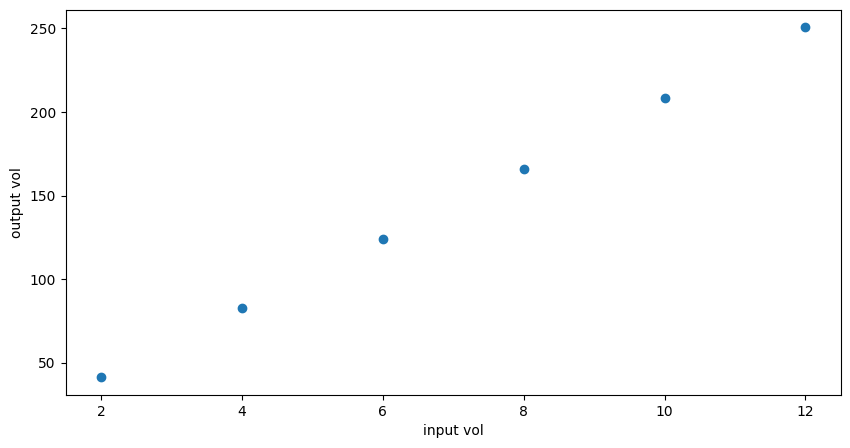

In [84]:

data = np.loadtxt('data/no_mag.txt', skiprows=3)

# Data
input_vol = data[:, 0]
output_vol = data[:, 1]
output_current = data[:, 2]

plt.figure(figsize=(10, 5))
plt.subplot
plt.plot(input_vol, output_vol, 'o', label='Data')
plt.xlabel('input vol')
plt.ylabel('output vol')
plt.show()


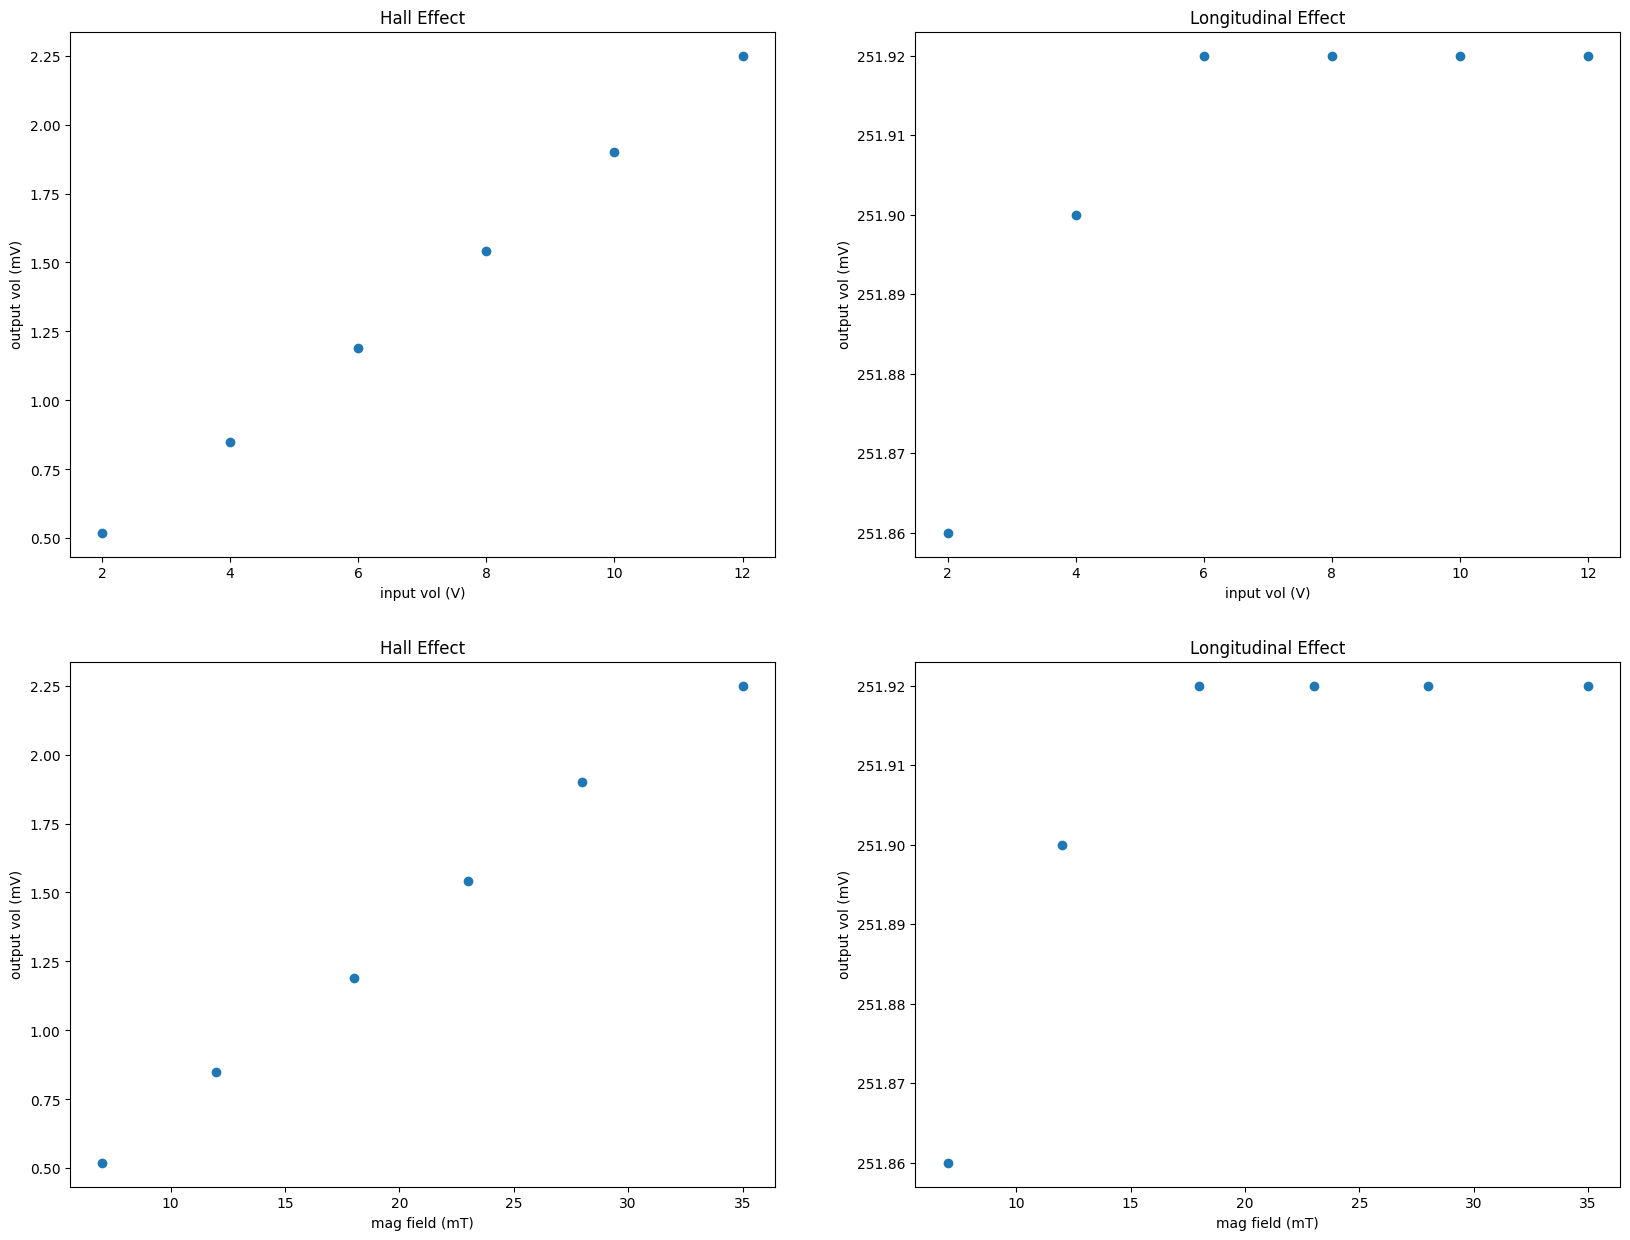

The number density in the hall bar is 5.647e+15, and the mobility is 0.491


In [85]:
def r_hall_2d(B, I, Vh):
    '''
    B is the magnetic field in mT \n
    I is the current in micro A \n
    Vh is the hall voltage in mV
    '''
    return Vh/(I*B*1e-3)

def res(V,I):
    '''
    V is the voltage in mV \n
    I is the current in micro A
    '''
    return (V*1e-3)/(I*1e-6)

def r_per_sq(res, width, length):
    '''
    res is the resistance in ohms \n
    width is the width of the sample in micro m \n
    length is the length of the sample in micro m
    '''
    return (res*width)/length

def num_per_sq(r_hall_2d):
    '''
    r_hall_2d is the function with parameters (B, I, Vh) \n
    '''
    return 1/(r_hall_2d*const.e)

def mobility(r_per_sq, n_per_sq):
    '''
    r_per_sq is the function with parameters (res, width, length) \n
    n_per_sq is the function with parameters (B, I, Vh) \n
    '''
    return 1/(n_per_sq*r_per_sq*const.e)#


data_hall = np.loadtxt('data/hall_mag_manual.txt', skiprows=3)
data_long = np.loadtxt('data/long_mag_manual.txt', skiprows=3)
hall_err = {
    '''
    out_vol in V 
    out_cur in A 
    b_field in T
    '''
    'out_vol': [5e-6,5e-6,5e-6,5e-6,5e-6,5e-6]
    'out_cur': [5e-9,5e-9,5e-9,5e-9,5e-9,5e-9]
    'b_field': [5e-4,5e-4,5e-4,5e-4,5e-4,5e-4]
    }

plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
plt.plot(data_hall[:, 0], data_hall[:, 1], 'o', label='Data')
plt.xlabel('input vol (V)')
plt.ylabel('output vol (mV)')
plt.title('Hall Effect')
plt.subplot(2,2,2)
plt.plot(data_long[:, 0], data_long[:, 1], 'o', label='Data')
plt.xlabel('input vol (V)')
plt.ylabel('output vol (mV)')
plt.title('Longitudinal Effect')
plt.subplot(2,2,3)
plt.plot(data_hall[:, 3], data_hall[:, 1], 'o', label='Data')
plt.xlabel('mag field (mT)')
plt.ylabel('output vol (mV)')
plt.title('Hall Effect')
plt.subplot(2,2,4)
plt.plot(data_long[:, 3], data_long[:, 1], 'o', label='Data')
plt.xlabel('mag field (mT)')
plt.ylabel('output vol (mV)')
plt.title('Longitudinal Effect')
plt.show()


n_sq = []
for i in np.arange(len(data_hall[:, 3])):
    n_sq.append(num_per_sq(r_hall_2d(data_hall[i, 3], data_hall[i, 1], data_hall[i, 2])))

n_sq_mean = np.mean(np.array(n_sq))

mu = []
for i in np.arange(len(data_long[:, 2])):
    mu.append(mobility(r_per_sq(res(data_long[i, 1], data_long[i, 2]),WIDTH,LENGTH), n_sq_mean))

mu = np.mean(np.array(mu))

print(f'The number density in the hall bar is {n_sq_mean:.4g}, and the mobility is {mu:.3f}')


# Part B

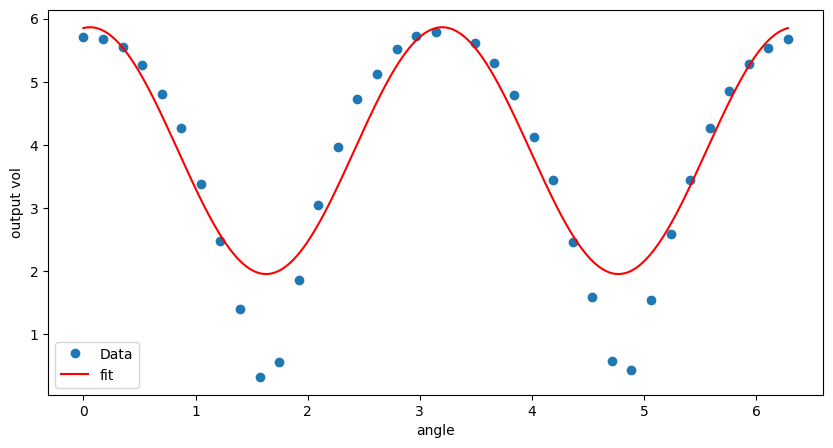

[ 1.95453368 -0.11762953]
the standard deviation is 0.0023693525441128857 on the amplitude, and 0.005598077219668391 on the phase


In [86]:
data = np.loadtxt('data/angle.txt', skiprows=2)
vol = data[:, 0]
angle = np.deg2rad(data[:, 1])
# x and b are in degrees, a is an amplitude constant

def func(x, a, b):
    return (a*np.cos(2*x + b)+2*a)

popt, pcov = curve_fit(func, angle, vol,p0 = (3.4,0))

angle_range = np.linspace(0, 2*np.pi, 1000)
plt.figure(figsize=(10, 5))
plt.plot(angle, vol,'o' ,label='Data')
plt.plot(angle_range, func(angle_range, *popt), 'r-', label='fit')
plt.xlabel('angle')
plt.ylabel('output vol')
plt.legend()
plt.show()
print(popt)
print(f'the standard deviation is {np.abs(np.diag(pcov)[0])} on the amplitude, and {np.abs(np.diag(pcov)[1])} on the phase')


# Part C

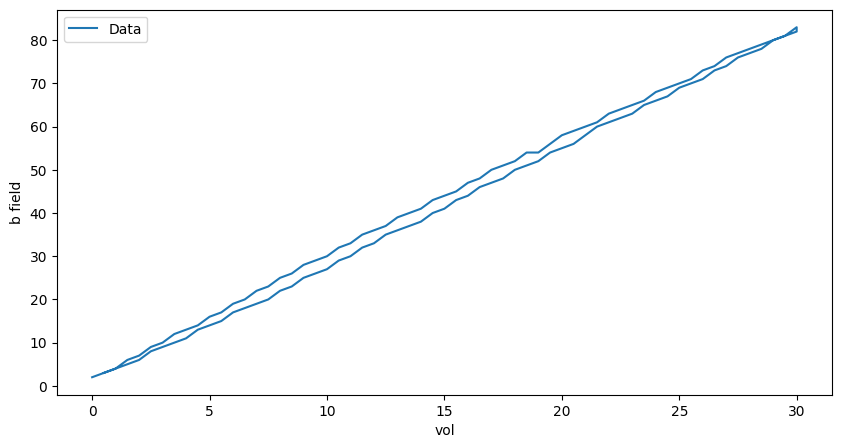

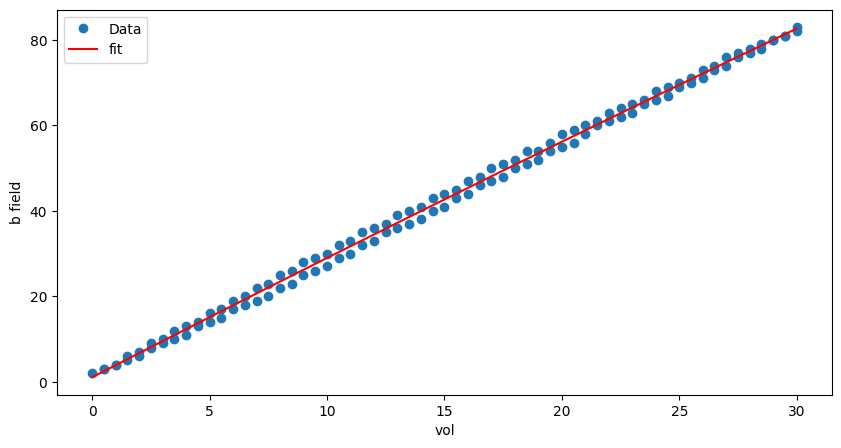

In [87]:
data =np.loadtxt('data/b_field_calibration.txt', skiprows=2)
vol = data[:, 0]
current = data[:, 1]
b_field = data[:, 2]
# x and b are in degrees, a is an amplitude constant
plt.figure(figsize=(10, 5))
plt.plot(vol, b_field, label='Data')

plt.xlabel('vol')
plt.ylabel('b field')
plt.legend()
plt.show()

def poly(x, a, b, c):
    return a*x**2 + b*x + c

popt, pcov = curve_fit(poly, vol, b_field,p0 = (1,1,1))

vol_range = np.linspace(0, 30, 1000)
plt.figure(figsize=(10, 5))
plt.plot(vol, b_field,'o' ,label='Data')
plt.plot(vol_range, poly(vol_range, *popt), 'r-', label='fit')
plt.xlabel('vol')
plt.ylabel('b field')
plt.legend()
plt.show()


# Part D

In [89]:
import HallPy_Teach as hall


ModuleNotFoundError: No module named 'HallPy_Teach'

In [90]:
ex = hall.setup()

NameError: name 'hall' is not defined